## **Executive Summary**

Intel is re-entering the smartwatch market after addressing previous product issues, with a focus on identifying the best customer segment to target. Using K-Means clustering on survey data, two key segments were identified: tech-savvy users who prioritize constant communication, timely information, and task management, and health-conscious consumers who value fitness tracking and well-being features. The analysis suggests Intel should focus on the health-conscious segment, as it presents a strong growth opportunity with fewer competitors and aligns with potential partnerships like Aetna. By targeting this segment, Intel can optimize its product offerings and marketing strategies to better compete in the smartwatch market, particularly by emphasizing health benefits. This targeted approach will enhance Intel’s market positioning and product differentiation.

In [43]:
import pandas as pd 
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans 
from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids
import scipy.stats
from sklearn import mixture
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from IPython import display

In [44]:
data = pd.read_excel("SmartWatch Data File (1).xlsx")
data

,ConstCom,TimelyInf,TaskMgm,DeviceSt,Wellness,Athlete,Style,AmznP,Female,Degree,Income,Age
0,3,2,3,3,2,3,3,1,1,1,2,38
1,6,6,6,6,5,3,1,1,0,2,3,38
2,7,4,4,4,6,4,1,0,0,1,3,42
3,7,5,4,5,5,4,4,1,0,2,5,35
4,7,4,2,6,3,2,4,1,0,1,3,36
...,...,...,...,...,...,...,...,...,...,...,...,...
995,5,5,5,4,6,5,6,1,0,2,4,37
996,7,7,6,5,5,2,5,1,0,1,5,36
997,5,6,7,7,4,3,5,1,0,1,5,40
998,1,1,4,3,2,4,3,1,0,1,1,39


In [45]:
columns = data.columns

### Scalling Data

In [46]:
scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)
scaled_data 

array([[-1.07752655, -1.46305719, -0.78467982, ..., -0.70498652,
        -1.14975745,  0.42375197],
       [ 0.83524247,  1.09250122,  1.1935046 , ...,  1.41846685,
        -0.2598523 ,  0.42375197],
       [ 1.47283214, -0.18527799, -0.12528501, ..., -0.70498652,
        -0.2598523 ,  1.10584769],
       ...,
       [ 0.1976528 ,  1.09250122,  1.85289941, ..., -0.70498652,
         1.51995799,  0.76479983],
       [-2.35270589, -2.1019468 , -0.12528501, ..., -0.70498652,
        -2.0396626 ,  0.5942759 ],
       [-2.35270589,  1.09250122,  1.85289941, ..., -0.70498652,
        -0.2598523 , -1.1109634 ]])

In [47]:
data = pd.DataFrame(scaled_data)
data.columns = columns

data

,ConstCom,TimelyInf,TaskMgm,DeviceSt,Wellness,Athlete,Style,AmznP,Female,Degree,Income,Age
0,-1.077527,-1.463057,-0.784680,-0.535521,-1.451216,-0.549373,-1.059359,0.879232,0.875662,-0.704987,-1.149757,0.423752
1,0.835242,1.092501,1.193505,1.377054,0.388095,-0.549373,-2.690397,0.879232,-1.141993,1.418467,-0.259852,0.423752
2,1.472832,-0.185278,-0.125285,0.102004,1.001198,0.125532,-2.690397,-1.137356,-1.141993,-0.704987,-0.259852,1.105848
3,1.472832,0.453612,-0.125285,0.739529,0.388095,0.125532,-0.243840,0.879232,-1.141993,1.418467,1.519958,-0.087820
4,1.472832,-0.185278,-1.444075,1.377054,-0.838112,-1.224278,-0.243840,0.879232,-1.141993,-0.704987,-0.259852,0.082704
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.197653,0.453612,0.534110,0.102004,1.001198,0.800438,1.387198,0.879232,-1.141993,1.418467,0.630053,0.253228
996,1.472832,1.731391,1.193505,0.739529,0.388095,-1.224278,0.571679,0.879232,-1.141993,-0.704987,1.519958,0.082704
997,0.197653,1.092501,1.852899,2.014579,-0.225009,-0.549373,0.571679,0.879232,-1.141993,-0.704987,1.519958,0.764800
998,-2.352706,-2.101947,-0.125285,-0.535521,-1.451216,0.125532,-1.059359,0.879232,-1.141993,-0.704987,-2.039663,0.594276


## PCA if it is needed 

In [48]:
'''
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(data)
data=pca.transform(data)
np.cumsum(pca.explained_variance_ratio_)

'''

'\nfrom sklearn.decomposition import PCA\npca=PCA(n_components=2)\npca.fit(data)\ndata=pca.transform(data)\nnp.cumsum(pca.explained_variance_ratio_)\n\n'

## Check Optimal Cluster using Elbow Method

C:\Users\ASUS ROG\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

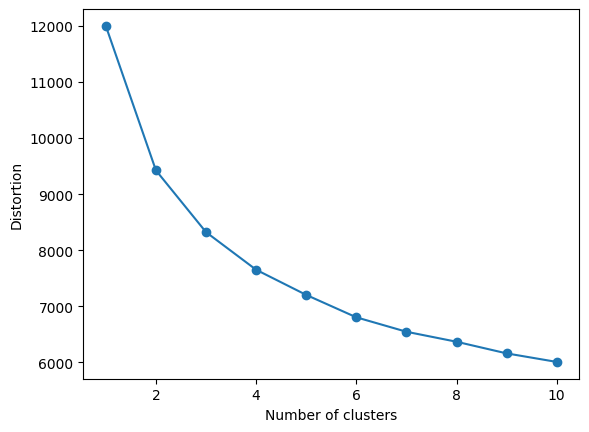

In [49]:
# calculate distortion for a range of number of cluster Using Kmeans
distortions = []
for i in range(1,11):
    cluster = KMeans(n_clusters = i )
    cluster.fit(data)
    distortions.append(cluster.inertia_)
    
# plot
plt.plot(range(1,11),distortions,marker ='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show

## Check Optimal Cluster using Shilloute Score Method

In [50]:
for n_clusters in range(2,11):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(data)
    centers = clusterer.cluster_centers_

    score = silhouette_score(data, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.1999021939667023)
For n_clusters = 3, silhouette score is 0.17626900844905194)
For n_clusters = 4, silhouette score is 0.16193388241712597)
For n_clusters = 5, silhouette score is 0.15918267046310772)
For n_clusters = 6, silhouette score is 0.14798740841047958)
For n_clusters = 7, silhouette score is 0.14141355686857116)
For n_clusters = 8, silhouette score is 0.14104176686170097)
For n_clusters = 9, silhouette score is 0.13087072188100982)
For n_clusters = 10, silhouette score is 0.1304394444750661)


## Clustering using K-Means

In [51]:
plt.figure(figsize=(15,10))
cluster1 = KMeans(n_clusters=3, random_state=0)
y = cluster1.fit_predict(data)

'''

plt.scatter(data.iloc[y == 0, 0], data.iloc[y == 0, 1],
           s=50, c='lightgreen', marker='s', edgecolor='black',
           label='cluster1')

plt.scatter(data.iloc[y == 1, 0], data.iloc[y == 1, 1],
           s=50, c='orange', marker='o', edgecolor='black',
           label='cluster2')

plt.scatter(data.iloc[y == 2, 0], data.iloc[y == 2, 1],
           s=50, c='blue', marker='^', edgecolor='black',
           label='cluster3')

# plot the centroids
plt.scatter(cluster1.cluster_centers_[:, 0], cluster1.cluster_centers_[:, 1],
           s=250, marker='*', c='red', edgecolor='black',
           label='centroids')

result_centroids_coordinates = cluster1.cluster_centers_[:, 0], cluster1.cluster_centers_[:, 1]

plt.legend(scatterpoints=1)
plt.grid()
plt.show()


'''

"\n\nplt.scatter(data.iloc[y == 0, 0], data.iloc[y == 0, 1],\n           s=50, c='lightgreen', marker='s', edgecolor='black',\n           label='cluster1')\n\nplt.scatter(data.iloc[y == 1, 0], data.iloc[y == 1, 1],\n           s=50, c='orange', marker='o', edgecolor='black',\n           label='cluster2')\n\nplt.scatter(data.iloc[y == 2, 0], data.iloc[y == 2, 1],\n           s=50, c='blue', marker='^', edgecolor='black',\n           label='cluster3')\n\n# plot the centroids\nplt.scatter(cluster1.cluster_centers_[:, 0], cluster1.cluster_centers_[:, 1],\n           s=250, marker='*', c='red', edgecolor='black',\n           label='centroids')\n\nresult_centroids_coordinates = cluster1.cluster_centers_[:, 0], cluster1.cluster_centers_[:, 1]\n\nplt.legend(scatterpoints=1)\nplt.grid()\nplt.show()\n\n\n"

<Figure size 1500x1000 with 0 Axes>

In [55]:
data = pd.read_excel("SmartWatch Data File (1).xlsx")
data

,ConstCom,TimelyInf,TaskMgm,DeviceSt,Wellness,Athlete,Style,AmznP,Female,Degree,Income,Age
0,3,2,3,3,2,3,3,1,1,1,2,38
1,6,6,6,6,5,3,1,1,0,2,3,38
2,7,4,4,4,6,4,1,0,0,1,3,42
3,7,5,4,5,5,4,4,1,0,2,5,35
4,7,4,2,6,3,2,4,1,0,1,3,36
...,...,...,...,...,...,...,...,...,...,...,...,...
995,5,5,5,4,6,5,6,1,0,2,4,37
996,7,7,6,5,5,2,5,1,0,1,5,36
997,5,6,7,7,4,3,5,1,0,1,5,40
998,1,1,4,3,2,4,3,1,0,1,1,39


In [56]:
data["clustering"] = y

In [67]:
data

,ConstCom,TimelyInf,TaskMgm,DeviceSt,Wellness,Athlete,Style,AmznP,Female,Degree,Income,Age,clustering
0,3,2,3,3,2,3,3,1,1,1,2,38,2
1,6,6,6,6,5,3,1,1,0,2,3,38,0
2,7,4,4,4,6,4,1,0,0,1,3,42,0
3,7,5,4,5,5,4,4,1,0,2,5,35,0
4,7,4,2,6,3,2,4,1,0,1,3,36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5,5,5,4,6,5,6,1,0,2,4,37,1
996,7,7,6,5,5,2,5,1,0,1,5,36,0
997,5,6,7,7,4,3,5,1,0,1,5,40,0
998,1,1,4,3,2,4,3,1,0,1,1,39,2


In [88]:
for key,groups in data.groupby(by = "clustering"):
    print(f"this is group/clustering {key}")
    print(groups.describe())

this is group/clustering 0
         ConstCom   TimelyInf     TaskMgm    DeviceSt    Wellness     Athlete  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     5.506849    5.621005    4.849315    5.045662    3.698630    2.538813   
std      1.311102    1.172200    1.394661    1.082690    1.404628    0.991755   
min      1.000000    3.000000    2.000000    2.000000    1.000000    1.000000   
25%      5.000000    5.000000    4.000000    4.000000    3.000000    2.000000   
50%      6.000000    6.000000    5.000000    5.000000    4.000000    3.000000   
75%      7.000000    7.000000    6.000000    6.000000    5.000000    3.000000   
max      7.000000    7.000000    7.000000    7.000000    7.000000    4.000000   

            Style       AmznP      Female      Degree      Income         Age  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     3.534247    0.538813    0.461187    1.447489    3.803653   39.388128   
